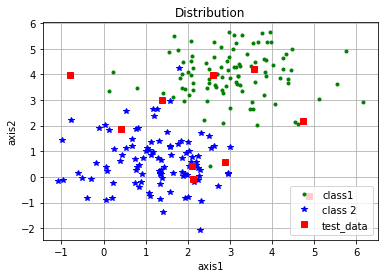

[15:40:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.09559943 0.8360047  0.82423085 0.9904246  0.03917496 0.9904246
 0.41789454 0.00980405 0.00980405 0.9895992 ]


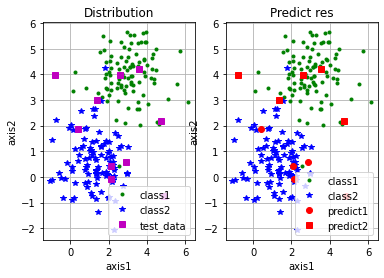

In [5]:
"""from urllib import request
print("use  request")
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
request.urlretrieve(url,"./data.csv")"""

# -*- coding=utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb


# train data
def get_train_data(data_size=100):
    data_label = np.zeros((2*data_size, 1))
    # class 1
    x1 = np.reshape(np.random.normal(3, 1, data_size), (data_size, 1))
    y1 = np.reshape(np.random.normal(4, 1, data_size), (data_size, 1))
    data_train = np.concatenate((x1, y1), axis=1)
    data_label[0:data_size, :] = 0
    # class 2
    x2 = np.reshape(np.random.normal(1, 1, data_size), (data_size, 1))
    y2 = np.reshape(np.random.normal(0.5, 1, data_size), (data_size, 1))
    data_train = np.concatenate((data_train, np.concatenate((x2, y2), axis=1)), axis=0)
    data_label[data_size:2*data_size, :] = 1

    return data_train, data_label


# test data
def get_test_data(start, end, data_size=100):
    data1 = (end - start) * np.random.random((data_size, 1)) + start
    data2 = (end - start) * np.random.random((data_size, 1)) + start
    data_test = np.concatenate((data1, data2), axis=1)
    return data_test


# show data distribution
def plot_data(train_data, data_size, test_data):
    plt.figure()
    plt.plot(train_data[0:data_size, 0], train_data[0:data_size, 1], 'g.',
             train_data[data_size:2*data_size, 0], train_data[data_size:2*data_size, 1], 'b*',
             test_data[:, 0], test_data[:, 1], 'rs')
    plt.legend(['class1', 'class 2', 'test_data'])
    plt.title('Distribution')
    plt.grid(True)
    plt.xlabel('axis1')
    plt.ylabel('axis2')
    plt.show()


# plot predict res
def plot_predict_data(train_data, data_size, test_data, predict_res1, predict_res2):
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.plot(train_data[0:data_size, 0], train_data[0:data_size, 1], 'g.',
             train_data[data_size:2*data_size, 0], train_data[data_size:2*data_size, 1], 'b*',
             test_data[:, 0], test_data[:, 1], 'ms')
    plt.legend(['class1', 'class2', 'test_data'])
    plt.title('Distribution')
    plt.grid(True)
    plt.xlabel('axis1')
    plt.ylabel('axis2')

    plt.subplot(1, 2, 2)
    plt.plot(train_data[0:data_size, 0], train_data[0:data_size, 1], 'g.',
             train_data[data_size:2 * data_size, 0], train_data[data_size:2 * data_size, 1], 'b*',
             predict_res1[:, 0], predict_res1[:, 1], 'ro',
             predict_res2[:, 0], predict_res2[:, 1], 'rs')
    plt.legend(['class1', 'class2', 'predict1', 'predict2'])
    plt.title('Predict res')
    plt.grid(True)
    plt.xlabel('axis1')
    plt.ylabel('axis2')
    plt.show()

# main function
if __name__ == '__main__':
    data_size = 100
    train_data0, label_data = get_train_data(data_size)  # train data generate
    test_data0 = get_test_data(-1, 5, 10)  # test data
    plot_data(train_data0, data_size, test_data0)  # plot
    # data convert
    train_data = xgb.DMatrix(train_data0, label=label_data)
    test_data = xgb.DMatrix(test_data0)

    # data training
    num_round = 50
    param = {'booster': 'gbtree', 'eta': 0.1, 'max_depth': 5, 'objective': 'binary:logistic'}
    bst = xgb.train(param, train_data, num_round)

    # make prediction
    predict_res = bst.predict(test_data)
    print (predict_res)
    index1 = predict_res > 0.5
    res1 = test_data0[index1, :]
    res2 = test_data0[~index1, :]

    # plot prediction result
    plot_predict_data(train_data0, data_size, test_data0, res1, res2)
    pri
